In [15]:
import numpy as np
%matplotlib inline
from keras import models
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import BatchNormalization
import warnings
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from keras.layers import Input



In [28]:
model_new = models.load_model('/home/biju/saving_outputs/model_2_careful_pictures/trial_1/best_weights.h5')

In [29]:
#printing the summary of the loaded model based on alexnet architecture (discussed in paper)
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 384)       8

In [30]:
# Wrapping the sequential layer into a functional
inputs = Input(shape=(256, 256, 3))
outputs = model_new(inputs)
model_new = Model(inputs, outputs)

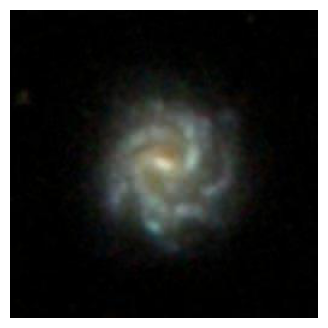

In [31]:
#input the image
image_path = "/home/biju/saving_outputs/model_2_careful_pictures/trial_1/testing/L/nNEWOBJ_375.jpg"   # replace with the filename
img = Image.open(image_path)
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis("off")  # hide axis
plt.show()

In [32]:
np_image=np.array(img).astype('float32') / 255.0 #normalize
np_image = transform.resize(np_image, (256, 256, 3), anti_aliasing=True) #resizing to 256 x 256
image = np.expand_dims(np_image, axis=0) #adding batch dimension

In [33]:
predict = model_new.predict(image)
class_labels = {0: "Lopsided", 1: "Symmetric"}
pred_class = np.argmax(predict, axis=1).item()
pred_label = class_labels[pred_class]
print(f"Predicted Class: {pred_class} → {pred_label}")
print(f"Probability of Lopsided (0): {predict[0][0]:.4f}")
print(f"Probability of Symmetric (1): {predict[0][1]:.4f}")


Predicted Class: 0 → Lopsided
Probability of Lopsided (0): 0.9995
Probability of Symmetric (1): 0.0005
